before drop the too low frequency values, it ramains : 34
after drop the too low frequency values, it ramains : 32


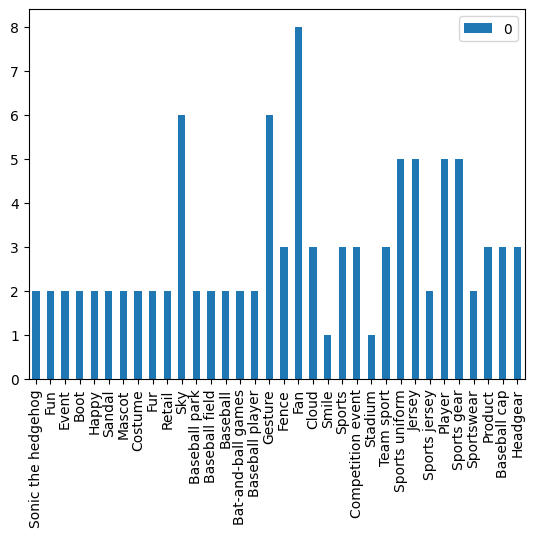

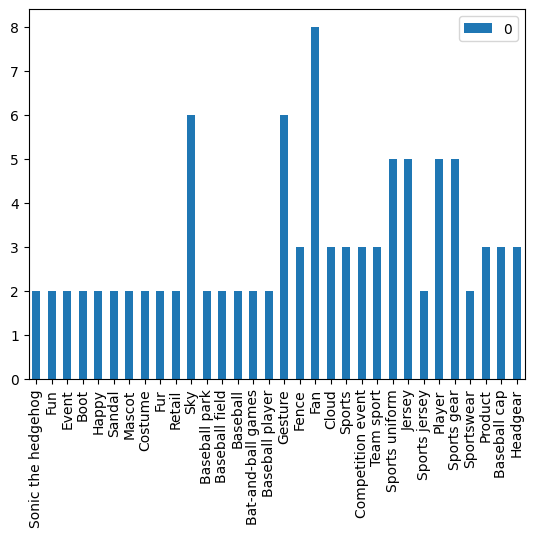

c:\Users\user-pc\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
c:\Users\user-pc\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\models\base_any2vec.py:322: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


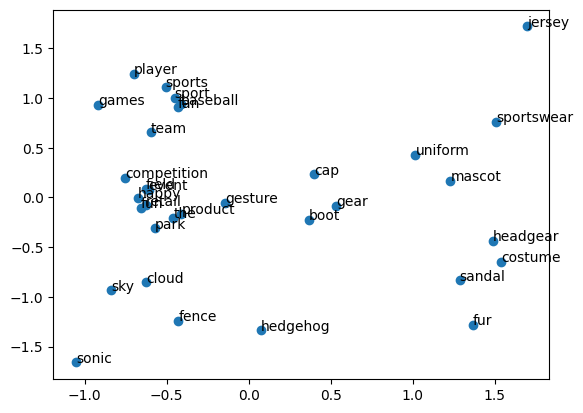

In [2]:
import csv
import pandas
from collections import Counter
import matplotlib.pyplot as plt

labels=[]
with open('labels.csv', 'r', newline='') as file:
  myreader = csv.reader(file, delimiter=',')
  for rows in myreader:
    labels.append(rows[0])


# print(labels)
letter_counts = Counter(labels)
# print(letter_counts)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
print("before drop the too low frequency values, it ramains : " + str(len(df)))
df.plot(kind='bar')

# N 개 값 이하는 없앤다.
enough_values=[]
i=0
while i<len(df):
  if df.iloc[i,0]<2:# i번째 행의 0번째 컬럼 값.
    
    # print("too low value : " + str(df.index[i]))    
    df.drop(df.index[i],axis=0,inplace=True)
    continue
  else:
    words=df.index[i].replace('-','').lower().split(' ')
    for word in words:
        enough_values.append(word)
    i+=1
print("after drop the too low frequency values, it ramains : " + str(len(df)))

df.plot(kind='bar')
plt.show()

# print(enough_values)

# enough_values에 사용할 labels가 있으니, 이것을 이용해 gensim으로 분석한다.

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
# from matplotlib import pyplot
from gensim.models import KeyedVectors
import gensim.downloader as api

def most_similarity_labels(word,enough_values,model,topn=10):
  sims=[]
  temp_w=[]
  for w in enough_values:
    if w in temp_w:
      continue
    temp_w.append(w) 
    sims.append({'word' : w ,'sim':model.similarity(word,w)})
  
  sims=sorted(sims, key=lambda e: (-e['sim']))
  return sims[:topn]



model = api.load('word2vec-google-news-300')
# vector = model.wv['computer']
# print(vector)

# 현존하는 가장 큰 모델을 가져왔다(총 3백만개 word embeddings을 학습.)
# 그렇지만 그래도 없는 단어가 우리가 수집한 label에 존재할 수도.
# 그 경우엔 에러에 뜬 단어는 직접 없애 줘야 한다.
# 아래는 삭제 예제.('organism' 단어가 없다고 오류가 떴을때)

enough_values.remove('batandball')



model_temp = Word2Vec([enough_values],size=300, min_count=1)
# print(model_temp.wv.vocab)



X = model[model_temp.wv.vocab] 


pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model_temp.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [4]:
# 아래는 most_similarity_labels.







print(most_similarity_labels('baseball',enough_values=enough_values,model=model,topn=10))





[{'word': 'baseball', 'sim': 0.9999999999999999}, {'word': 'sports', 'sim': 0.5657501566671146}, {'word': 'sport', 'sim': 0.442230584853914}, {'word': 'player', 'sim': 0.3511348338764723}, {'word': 'games', 'sim': 0.31394687299865665}, {'word': 'uniform', 'sim': 0.28905047595096955}, {'word': 'team', 'sim': 0.2753012108702546}, {'word': 'jersey', 'sim': 0.2631342083943131}, {'word': 'fan', 'sim': 0.25516890161229633}, {'word': 'mascot', 'sim': 0.24511388982113597}]
